<a href="https://colab.research.google.com/github/jdescartes24/Graphing-Exercise/blob/main/Core_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
sales_predictions=  '/content/sales_predictions.csv'

sales=pd.read_csv(sales_predictions)

sales.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
sales = sales.rename(columns={'Item_Identifier':'item identifier',
                              'Item_Weight': 'item weight',
                        'Outlet_Size': 'outlet size'})

sales.head()

,item identifier,item weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,outlet size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
check= sales.groupby(['Item_Type','outlet size'])[["Item_Outlet_Sales"]].sum()


In [4]:
sales.shape

(8523, 12)

In [5]:
sales.dtypes

item identifier               object
item weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
outlet size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
sales.duplicated().any()

False

In [7]:
sales.isnull().sum() 

item identifier                 0
item weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
outlet size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#sales[sales['outlet size'].isnull()]

j=sales[sales['Outlet_Type']== 'Supermarket Type1' ]

b=sales[sales['Outlet_Type']== 'Grocery Store' ]

b['outlet size'].value_counts()

sales['outlet size'].fillna(value = 'Small', inplace = True)

sales.isnull().sum()
# Outlet Size missing values will be changed to small because I notice most of the missing values were from grocery store and Type 1 stores and majory of those store 
#had outlet sizes of small.

item identifier                 0
item weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
outlet size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
sales['outlet size'].value_counts()


Small     4798
Medium    2793
High       932
Name: outlet size, dtype: int64

In [10]:
	#sales['item weight'].fillna(value = sales['item weight'].mean(), inplace = True)

# decided to keep it weight and use this function to fill in the gaps because it may be important when it come to shiping cost.

In [11]:
sales.isnull().sum() 
#proof of not more empty values

item identifier                 0
item weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
outlet size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
sales.replace(['LF'],['Low Fat'], inplace=True)

sales.replace(['low fat'],['Low Fat'], inplace=True)

sales.replace(['reg'],['Regular'], inplace=True)

sales.replace(['High'],['Large'], inplace=True)

In [13]:
sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
sales['item weight'].describe().round()

count    7060.0
mean       13.0
std         5.0
min         5.0
25%         9.0
50%        13.0
75%        17.0
max        21.0
Name: item weight, dtype: float64

In [15]:
sales['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [16]:
sales['Item_MRP'].describe().round()

count    8523.0
mean      141.0
std        62.0
min        31.0
25%        94.0
50%       143.0
75%       186.0
max       267.0
Name: Item_MRP, dtype: float64

In [17]:
sales['Item_Outlet_Sales'].describe().round()

count     8523.0
mean      2181.0
std       1706.0
min         33.0
25%        834.0
50%       1794.0
75%       3101.0
max      13087.0
Name: Item_Outlet_Sales, dtype: float64

In [18]:
sales.isnull().sum() 
#proof of not more empty values

item identifier                 0
item weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
outlet size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Chart to see what stores made the **most** sales 


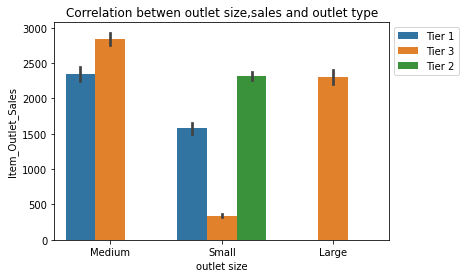

In [19]:
sns.barplot(data=sales, x = 'outlet size', y= 'Item_Outlet_Sales', hue='Outlet_Location_Type' );
plt.title('Correlation betwen outlet size,sales and outlet type');
plt.legend(bbox_to_anchor=(1,1),loc ="upper left");
## It looks like Tier 3 store yeild the most sales but the medium size stores made the most sales

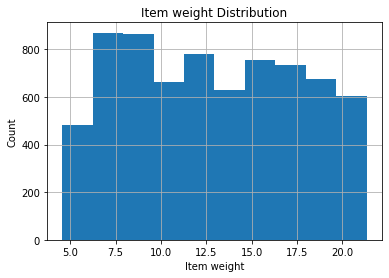

In [20]:
sales['item weight'].hist();
plt.ylabel('Count');
plt.xlabel('Item weight');
plt.title('Item weight Distribution');
# This shows that around 2300 of the items we carry are between the 11 and 13 pound range

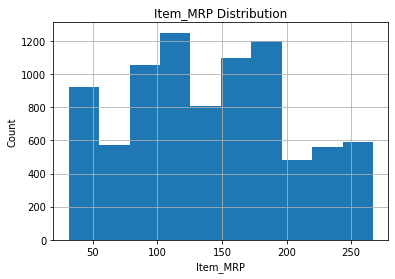

In [21]:
sales['Item_MRP'].hist();
plt.ylabel('Count');
plt.xlabel('Item_MRP');
plt.title('Item_MRP Distribution');

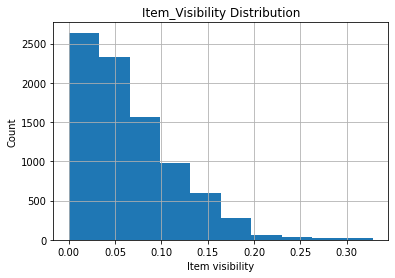

In [22]:
sales['Item_Visibility'].hist();
plt.ylabel('Count');
plt.xlabel('Item visibility');
plt.title('Item_Visibility Distribution');

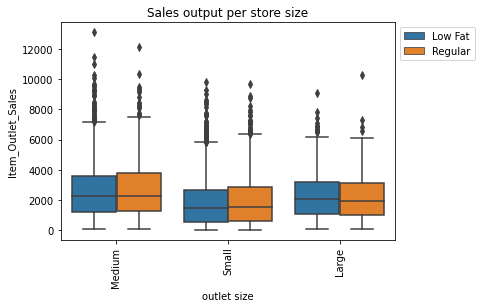

In [23]:
sns.boxplot(x='outlet size', y='Item_Outlet_Sales', hue= 'Item_Fat_Content', data=sales);
plt.legend(bbox_to_anchor= (1,1), loc = 'upper left');
plt.title(label="Sales output per store size");
plt.xticks(rotation= 90);

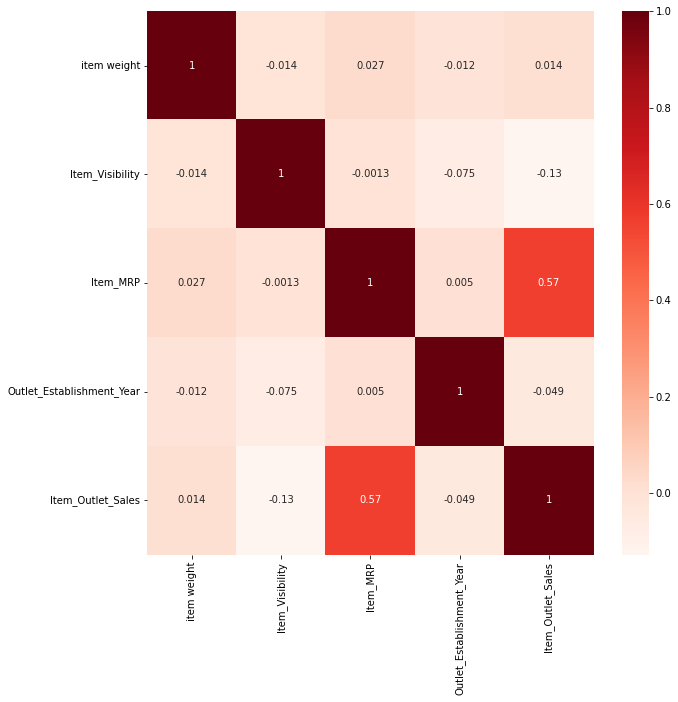

In [24]:

plt.figure(figsize=(10,10))
sns.heatmap(sales.corr(), cmap='Reds', annot=True);

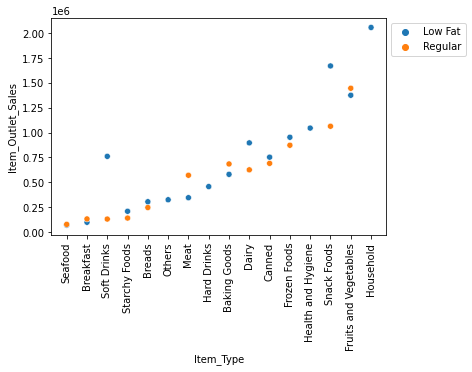

In [25]:
sale_f=sales.groupby(['Item_Type', 'Item_Fat_Content']).sum().reset_index()
sale_f= sale_f.sort_values(by='Item_Outlet_Sales');
sns.scatterplot(data= sale_f, x= 'Item_Type', y= 'Item_Outlet_Sales', hue='Item_Fat_Content');
plt.xticks(rotation = 90);
plt.legend(bbox_to_anchor= (1,1), loc = 'upper left');


# ***Chart to see the evolution of low fat vs regualar over time ***

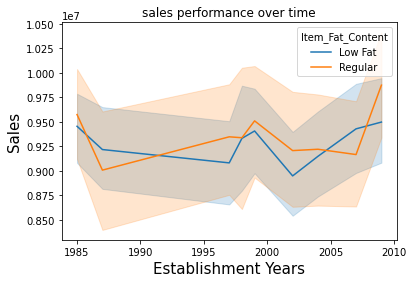

In [26]:

sns.lineplot(data= sales, x='Outlet_Establishment_Year', y=sales['Item_Outlet_Sales'].cumsum(),hue=	'Item_Fat_Content', );

plt.title('sales performance over time');
plt.ylabel('Sales',fontsize=15);
plt.xlabel('Establishment Years',fontsize=15);


In [27]:
sales.head(3)

,item identifier,item weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,outlet size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


# ***This is where we start machine learming on this data to predeict data***

we will start be selecting the X and y split.

In [28]:
X = sales.drop(columns = 'Item_Outlet_Sales' )

y = sales['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)



# *In our data there is two Ordinal data columns*

In [29]:
olt = {'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2 };

ot = {'Small': 0, 'Medium': 1, 'High': 2 };

X_train['Outlet_Location_Type'] = X_train['Outlet_Location_Type'].replace(olt, inplace= True);

X_train['outlet size'] = X_train['outlet size'].replace(ot, inplace= True);
#checking to see if the changes were sucessfull
X_train.head()



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

,item identifier,item weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,outlet size,Outlet_Location_Type,Outlet_Type
4776,NCG06,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,None,None,Supermarket Type2
7510,FDV57,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,None,None,Supermarket Type2
5828,FDM27,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,None,None,Supermarket Type1
5327,FDG24,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,None,None,Supermarket Type1
4810,FDD05,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,None,None,Supermarket Type1


# ***Using column selector to seperate my columns so I can transform them appropriately.***

In [30]:
#selecting all my numerical columns
num_selector = make_column_selector(dtype_include='number')
#selecting on my object columns
cat_selector = make_column_selector(dtype_include='object')


# ***Making a variable for my one hot encoder and passing it on my categorical columns***

In [31]:
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe= (ohe_encoder, cat_selector)


# Making a variable for Imputer function and passing it on my numerical columns using the median colums , so I can get ints ranther than floats on the column with missing data.***italicized text***

In [32]:
imputer = SimpleImputer(strategy='median')
med_t= (imputer, num_selector )

# ***Creating a variable with the column transfer function and passing the imputer and the OHE variable to be transformed***

In [38]:
column_transformer = make_column_transformer(ohe, med_t, remainder= 'passthrough')

#Creating a linear Regression model to be later passed on to my data using pipeline
lin_reg= LinearRegression()

Using pipe function to creat a variable to pass fit our column transformer and our linear Regrestion model onto our data. 
# ***Then fiting that variable on to our training data.***

In [39]:

pipe= make_pipeline(column_transformer, lin_reg)

pipe.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector obje...d4d2c540d0>),
                                                 ('simpleimputer',
                                                  SimpleImputer(a